In [169]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import sys

# Redirect standard output to a variable
original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Restore the original standard output
sys.stdout = original_stdout

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [170]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


In [171]:
import os
import json  # Make sure to import the 'json' module

problems = []
levels = []
types = []

root_directory = "/kaggle/input/math-dataset/MATH/train"

for subdir, _, files in os.walk(root_directory):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(subdir, file)
            with open(file_path, "r") as json_file:
                data = json.load(json_file)
                problems.append(data["problem"])
                levels.append(data["level"])
                types.append(data["type"])


In [172]:
data_dict = {
    "problem": problems,
    "level": levels,
    "type": types
}

df = pd.DataFrame(data_dict)


In [173]:
df.head()

,problem,level,type
0,The United States Postal Service charges an ex...,Level 3,Prealgebra
1,How many integers between 1000 and 2000 have a...,Level 4,Prealgebra
2,"Given that $n$ is an integer and $0 < 4n <30$,...",Level 2,Prealgebra
3,How many integers between $100$ and $150$ have...,Level 4,Prealgebra
4,Regular pentagon $ABCDE$ and regular hexagon $...,Level 4,Prealgebra


In [174]:
df['Difficulty_level'] = df['level'].replace({
    'Level 1': 1,
    'Level 2': 2,
    'Level 3': 3,
    'Level 4': 4,
    'Level 5': 5
})
df['Difficulty_level'].value_counts()

Difficulty_level
5          2304
4          1690
3          1592
2          1348
1           564
Level ?       2
Name: count, dtype: int64

In [175]:
#Removing the 2 values without Level encoding
df = df[df['Difficulty_level'] != 'Level ?']

In [176]:
df['Difficulty_level'].value_counts()

Difficulty_level
5    2304
4    1690
3    1592
2    1348
1     564
Name: count, dtype: int64

In [177]:
df['type'].value_counts()

type
Algebra                   1744
Intermediate Algebra      1295
Prealgebra                1205
Number Theory              869
Geometry                   868
Counting & Probability     771
Precalculus                746
Name: count, dtype: int64

In [178]:
#Seeing the the count of Algebra problems
count_algebra = (df['type'].str.contains('algebra', case=False)).sum()
count_algebra

4244

In [179]:
import pandas as pd

# Filter rows where 'type' is 'algebra'
algebra_df = df[df['type'].str.contains('algebra', case=False)]
print(algebra_df.shape)
# Export the filtered DataFrame to a new CSV file
algebra_df.to_csv('algebra_problems_v1.csv', index=False)

(4244, 4)


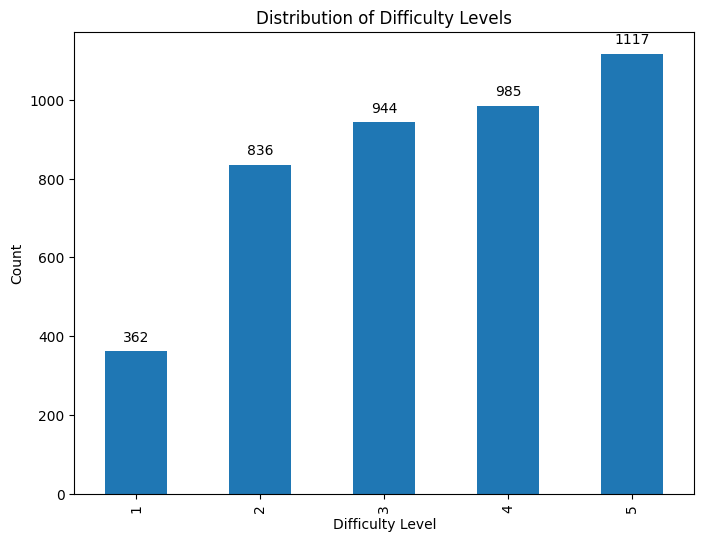

In [180]:
import matplotlib.pyplot as plt

# Group the data by 'Difficulty_level' and count the occurrences of each level
difficulty_counts = algebra_df['Difficulty_level'].value_counts().loc[[1, 2, 3, 4, 5]]

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = difficulty_counts.plot(kind='bar')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')

# Show the plot
plt.show()


In [181]:
# replace few known latex symbols
import pandas as pd

# Replace \left, \right, \qqaud, [\asy], [asy], \times, \emph, \mbox{ cm}, and {\mathrm{th}} with the desired values
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\left', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\right', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\qqaud', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\[asy\]', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\[asy\]', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\times', '*', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\emph', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\mbox{ (.*?)}', r'\1', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\{(.*?)\\}\\^{\\mathrm{th}}', r'\1^th', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\$\$\s+', r'$$', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\s+\$\$', r'$$', regex=True)

# Display the updated DataFrame
print(algebra_df)


                                                problem    level  \
0     The United States Postal Service charges an ex...  Level 3   
1     How many integers between 1000 and 2000 have a...  Level 4   
2     Given that $n$ is an integer and $0 < 4n <30$,...  Level 2   
3     How many integers between $100$ and $150$ have...  Level 4   
4     Regular pentagon $ABCDE$ and regular hexagon $...  Level 4   
...                                                 ...      ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...  Level 5   
7496  Let $a$ and $b$ be real numbers.  Find the max...  Level 4   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...  Level 5   
7498  There is a smallest positive real number $a$ s...  Level 5   
7499  A function $f$ has domain $[0,2]$ and range $[...  Level 3   

                      type Difficulty_level  
0               Prealgebra                3  
1               Prealgebra                4  
2               Prealgebra                2  

In [182]:
# Find rows with blank values in the 'problem' column
blank_rows = algebra_df[algebra_df['problem'].str.strip() == '']

# Get the number of rows with blank values
blank_count = len(blank_rows)

# Display the row numbers of rows with blank values
if blank_count > 0:
    blank_row_numbers = blank_rows.index
    print(f"Number of Rows with Blank Values: {blank_count}")
    print(f"Row Numbers with Blank Values: {list(blank_row_numbers)}")
else:
    print("No Rows with Blank Values")


No Rows with Blank Values


In [183]:
algebra_df.head()

,problem,level,type,Difficulty_level
0,The United States Postal Service charges an ex...,Level 3,Prealgebra,3
1,How many integers between 1000 and 2000 have a...,Level 4,Prealgebra,4
2,"Given that $n$ is an integer and $0 < 4n <30$,...",Level 2,Prealgebra,2
3,How many integers between $100$ and $150$ have...,Level 4,Prealgebra,4
4,Regular pentagon $ABCDE$ and regular hexagon $...,Level 4,Prealgebra,4


In [184]:
#Deleting redundant Column

algebra_df.drop(columns=['level','type'], inplace=True)

In [185]:
# Creating a new 'Question' column and copying 'problem' values
algebra_df['OriginalQuestion'] = algebra_df['problem']

In [186]:
algebra_df.head()

,problem,Difficulty_level,OriginalQuestion
0,The United States Postal Service charges an ex...,3,The United States Postal Service charges an ex...
1,How many integers between 1000 and 2000 have a...,4,How many integers between 1000 and 2000 have a...
2,"Given that $n$ is an integer and $0 < 4n <30$,...",2,"Given that $n$ is an integer and $0 < 4n <30$,..."
3,How many integers between $100$ and $150$ have...,4,How many integers between $100$ and $150$ have...
4,Regular pentagon $ABCDE$ and regular hexagon $...,4,Regular pentagon $ABCDE$ and regular hexagon $...


In [188]:
import re
import pandas as pd

# Function to extract and store unique variables
def extract_variables(question):
    variable_pattern = r'\b[a-zA-Z]{3,}\b'
    variable_matches = re.findall(variable_pattern, question)
    unique_variables = list(set(variable_matches))
    return unique_variables

# Assuming algebra_df is your DataFrame with a 'problem' column
algebra_df['variables'] = algebra_df['problem'].apply(extract_variables)

# Display the DataFrame with the new 'variables' column
print(algebra_df[['problem', 'variables']])


                                                problem  \
0     The United States Postal Service charges an ex...   
1     How many integers between 1000 and 2000 have a...   
2     Given that $n$ is an integer and $0 < 4n <30$,...   
3     How many integers between $100$ and $150$ have...   
4     Regular pentagon $ABCDE$ and regular hexagon $...   
...                                                 ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...   
7496  Let $a$ and $b$ be real numbers.  Find the max...   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...   
7498  There is a smallest positive real number $a$ s...   
7499  A function $f$ has domain $[0,2]$ and range $[...   

                                              variables  
0     [hline, envelope, four, begin, For, the, than,...  
1     [and, between, How, three, numbers, have, fact...  
2     [and, possible, the, all, what, Given, values,...  
3     [and, order, One, between, different, digits, ...  
4

In [189]:
import pandas as pd
import re

def clean_question(question):
    # regex for cleaning
    question = re.sub(r'\\(cfrac|dfrac|rfrac|lceil|rceil|cdot|div){.*?}', '', question)
    question = re.sub(r'(?:(?<=\D)|^)(\d+(?:\.\d+)?)(?:(?=\D)|$)', '', question) #for numbers
    question = re.sub(r'[${}()\\/\\\\\[\]]', '', question)
    question = re.sub(r'(>=|<=|=)', '', question) #for equation
    question = re.sub(r'\\[a-zA-Z]+', '', question)  # Remove remaining LaTeX commands
    question = re.sub(r'[+*/^<>]|-(?![\-])', '', question)  # math symbols
    return question

# Assuming algebra_df is your DataFrame with a 'problem' column
algebra_df['cleaned_problem'] = algebra_df['problem'].apply(lambda x: clean_question(x))

# Display the DataFrame
print(algebra_df)


                                                problem Difficulty_level  \
0     The United States Postal Service charges an ex...                3   
1     How many integers between 1000 and 2000 have a...                4   
2     Given that $n$ is an integer and $0 < 4n <30$,...                2   
3     How many integers between $100$ and $150$ have...                4   
4     Regular pentagon $ABCDE$ and regular hexagon $...                4   
...                                                 ...              ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...                5   
7496  Let $a$ and $b$ be real numbers.  Find the max...                4   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...                5   
7498  There is a smallest positive real number $a$ s...                5   
7499  A function $f$ has domain $[0,2]$ and range $[...                3   

                                       OriginalQuestion  \
0     The United States Post

In [190]:
algebra_df.head()

,problem,Difficulty_level,OriginalQuestion,variables,cleaned_problem
0,The United States Postal Service charges an ex...,3,The United States Postal Service charges an ex...,"[hline, envelope, four, begin, For, the, than,...",The United States Postal Service charges an ex...
1,How many integers between 1000 and 2000 have a...,4,How many integers between 1000 and 2000 have a...,"[and, between, How, three, numbers, have, fact...",How many integers between and have all three...
2,"Given that $n$ is an integer and $0 < 4n <30$,...",2,"Given that $n$ is an integer and $0 < 4n <30$,...","[and, possible, the, all, what, Given, values,...","Given that n is an integer and n , what is t..."
3,How many integers between $100$ and $150$ have...,4,How many integers between $100$ and $150$ have...,"[and, order, One, between, different, digits, ...",How many integers between and have three dif...
4,Regular pentagon $ABCDE$ and regular hexagon $...,4,Regular pentagon $ABCDE$ and regular hexagon $...,"[and, drawn, segment, opposite, line, What, de...",Regular pentagon ABCDE and regular hexagon AEF...


In [191]:
algebra_df['Wordcount'] = algebra_df['variables'].apply(len)


In [192]:
algebra_df.head()

,problem,Difficulty_level,OriginalQuestion,variables,cleaned_problem,Wordcount
0,The United States Postal Service charges an ex...,3,The United States Postal Service charges an ex...,"[hline, envelope, four, begin, For, the, than,...",The United States Postal Service charges an ex...,34
1,How many integers between 1000 and 2000 have a...,4,How many integers between 1000 and 2000 have a...,"[and, between, How, three, numbers, have, fact...",How many integers between and have all three...,11
2,"Given that $n$ is an integer and $0 < 4n <30$,...",2,"Given that $n$ is an integer and $0 < 4n <30$,...","[and, possible, the, all, what, Given, values,...","Given that n is an integer and n , what is t...",10
3,How many integers between $100$ and $150$ have...,4,How many integers between $100$ and $150$ have...,"[and, order, One, between, different, digits, ...",How many integers between and have three dif...,14
4,Regular pentagon $ABCDE$ and regular hexagon $...,4,Regular pentagon $ABCDE$ and regular hexagon $...,"[and, drawn, segment, opposite, line, What, de...",Regular pentagon ABCDE and regular hexagon AEF...,30


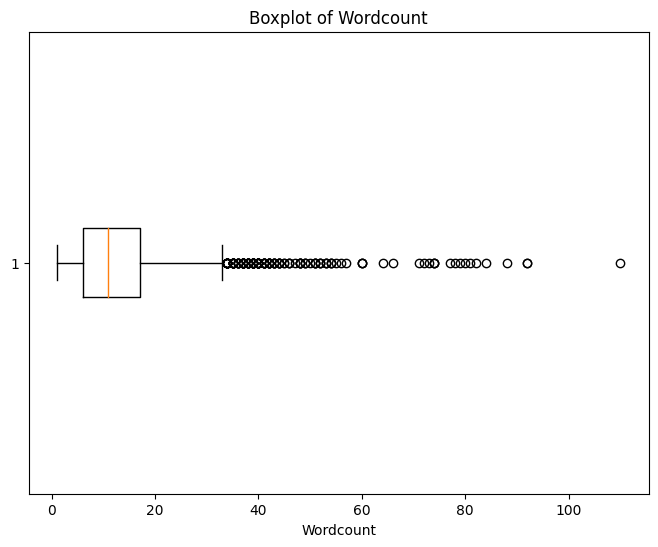

Q1: 6.0
Median (Q2): 11.0
Q3: 17.0
IQR: 11.0
Minimum Value: 1
Maximum Value: 110
80th Percentile Value: 18.0
85th Percentile Value: 21.0
90th Percentile Value: 25.0


In [193]:
import matplotlib.pyplot as plt

# Create a boxplot of the 'variable_count' column
plt.figure(figsize=(8, 6))
plt.boxplot(algebra_df['Wordcount'], vert=False)

# Add labels and title
plt.xlabel('Wordcount')
plt.title('Boxplot of Wordcount')

# Show the plot
plt.show()

# Calculate quartiles Q1, Q2 (median), Q3, IQR, min, and max values
q1 = algebra_df['Wordcount'].quantile(0.25)
q2 = algebra_df['Wordcount'].median()
q3 = algebra_df['Wordcount'].quantile(0.75)
iqr = q3 - q1
min_value = algebra_df['Wordcount'].min()
max_value = algebra_df['Wordcount'].max()

print(f'Q1: {q1}')
print(f'Median (Q2): {q2}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')
print(f'Minimum Value: {min_value}')
print(f'Maximum Value: {max_value}')
# Calculate the value at the 80th percentile
percentile_80 = algebra_df['Wordcount'].quantile(0.8)
percentile_85 = algebra_df['Wordcount'].quantile(0.85)
percentile_90 = algebra_df['Wordcount'].quantile(0.9)
print(f'80th Percentile Value: {percentile_80}')
print(f'85th Percentile Value: {percentile_85}')
print(f'90th Percentile Value: {percentile_90}')


In [194]:
# Filter rows where 'variable count' is less than or equal to 25
algebra_df = algebra_df[algebra_df['Wordcount'] <= 25]
algebra_df.head()

,problem,Difficulty_level,OriginalQuestion,variables,cleaned_problem,Wordcount
1,How many integers between 1000 and 2000 have a...,4,How many integers between 1000 and 2000 have a...,"[and, between, How, three, numbers, have, fact...",How many integers between and have all three...,11
2,"Given that $n$ is an integer and $0 < 4n <30$,...",2,"Given that $n$ is an integer and $0 < 4n <30$,...","[and, possible, the, all, what, Given, values,...","Given that n is an integer and n , what is t...",10
3,How many integers between $100$ and $150$ have...,4,How many integers between $100$ and $150$ have...,"[and, order, One, between, different, digits, ...",How many integers between and have three dif...,14
5,"A storm in Sydney, Australia, caused $\$$30 mi...",4,"A storm in Sydney, Australia, caused $\$$30 mi...","[time, million, Determine, worth, the, Sydney,...","A storm in Sydney, Australia, caused million ...",20
6,How many 4-digit positive integers exist that ...,5,How many 4-digit positive integers exist that ...,"[and, last, conditions, Each, exist, the, inte...",How many digit positive integers exist that sa...,21


In [195]:
#Deleting redundant Column

algebra_df.drop(columns=['variables'], inplace=True)

In [196]:
algebra_df.head()

,problem,Difficulty_level,OriginalQuestion,cleaned_problem,Wordcount
1,How many integers between 1000 and 2000 have a...,4,How many integers between 1000 and 2000 have a...,How many integers between and have all three...,11
2,"Given that $n$ is an integer and $0 < 4n <30$,...",2,"Given that $n$ is an integer and $0 < 4n <30$,...","Given that n is an integer and n , what is t...",10
3,How many integers between $100$ and $150$ have...,4,How many integers between $100$ and $150$ have...,How many integers between and have three dif...,14
5,"A storm in Sydney, Australia, caused $\$$30 mi...",4,"A storm in Sydney, Australia, caused $\$$30 mi...","A storm in Sydney, Australia, caused million ...",20
6,How many 4-digit positive integers exist that ...,5,How many 4-digit positive integers exist that ...,How many digit positive integers exist that sa...,21


In [197]:
pip install textstat


Note: you may need to restart the kernel to use updated packages.


In [198]:
import pandas as pd
import textstat
import string
import re

# Assuming you have a DataFrame named 'algebra_df' with 'problem' column containing questions

# Function for text preprocessing and readability index calculation
def calculate_readability_index(problem, index_type):
    try:
        # Lowercasing
        problem = problem.lower()

        # Removing punctuation
        problem = problem.translate(str.maketrans('', '', string.punctuation))

        # Removing HTML tags
        problem = re.sub(r'<.*?>', '', problem)

        # Removing numeric/decimal values
        # problem = re.sub(r'\b\d+(\.\d+)?\b', '', problem)

        # Calculating readability indexes
        if index_type == 'flesch_reading_ease':
            return textstat.flesch_reading_ease(problem)
        elif index_type == 'flesch_kincaid_grade':
            return textstat.flesch_kincaid_grade(problem)
        elif index_type == 'gunning_fog':
            return textstat.gunning_fog(problem)
        elif index_type == 'automated_readability_index':
            return textstat.automated_readability_index(problem)
        elif index_type == 'coleman_liau_index':
            return textstat.coleman_liau_index(problem)
        elif index_type == 'dale_chall_readability_score':
            return textstat.dale_chall_readability_score(problem)
        elif index_type == 'linsear_write_formula':
            return textstat.linsear_write_formula(problem)
        elif index_type == 'spache_readability_formula':
            return textstat.spache_readability_formula(problem)
        else:
            return None
    except:
        # Handle cases where the calculation may fail (e.g., empty or very short text)
        return None

# Apply the function to each row of the DataFrame and assign to separate columns
algebra_df['Flesch_Reading_Ease'] = algebra_df['cleaned_problem'].apply(lambda x: calculate_readability_index(x, 'flesch_reading_ease'))
algebra_df['Flesch_Kincaid_Grade'] = algebra_df['cleaned_problem'].apply(lambda x: calculate_readability_index(x, 'flesch_kincaid_grade'))
algebra_df['Gunning_Fog'] = algebra_df['cleaned_problem'].apply(lambda x: calculate_readability_index(x, 'gunning_fog'))
algebra_df['Automated_Readability_Index'] = algebra_df['cleaned_problem'].apply(lambda x: calculate_readability_index(x, 'automated_readability_index'))
algebra_df['Coleman_Liau_Index'] = algebra_df['cleaned_problem'].apply(lambda x: calculate_readability_index(x, 'coleman_liau_index'))
algebra_df['Dale_Chall_Readability_Score'] = algebra_df['cleaned_problem'].apply(lambda x: calculate_readability_index(x, 'dale_chall_readability_score'))
algebra_df['Linsear_Write_Formula'] = algebra_df['cleaned_problem'].apply(lambda x: calculate_readability_index(x, 'linsear_write_formula'))
algebra_df['Spache_Readability_Formula'] = algebra_df['cleaned_problem'].apply(lambda x: calculate_readability_index(x, 'spache_readability_formula'))

# Display the DataFrame with the new columns
print(algebra_df)


                                                problem Difficulty_level  \
1     How many integers between 1000 and 2000 have a...                4   
2     Given that $n$ is an integer and $0 < 4n <30$,...                2   
3     How many integers between $100$ and $150$ have...                4   
5     A storm in Sydney, Australia, caused $\$$30 mi...                4   
6     How many 4-digit positive integers exist that ...                5   
...                                                 ...              ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...                5   
7496  Let $a$ and $b$ be real numbers.  Find the max...                4   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...                5   
7498  There is a smallest positive real number $a$ s...                5   
7499  A function $f$ has domain $[0,2]$ and range $[...                3   

                                       OriginalQuestion  \
1     How many integers betw

In [199]:
algebra_df.head()

,problem,Difficulty_level,OriginalQuestion,cleaned_problem,Wordcount,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,Dale_Chall_Readability_Score,Linsear_Write_Formula,Spache_Readability_Formula
1,How many integers between 1000 and 2000 have a...,4,How many integers between 1000 and 2000 have a...,How many integers between and have all three...,11,74.19,6.4,8.46,6.1,7.42,7.71,7.0,None
2,"Given that $n$ is an integer and $0 < 4n <30$,...",2,"Given that $n$ is an integer and $0 < 4n <30$,...","Given that n is an integer and n , what is t...",10,69.11,8.3,9.71,4.4,2.85,7.07,12.5,None
3,How many integers between $100$ and $150$ have...,4,How many integers between $100$ and $150$ have...,How many integers between and have three dif...,14,46.78,10.7,13.90,10.7,12.18,8.38,12.0,None
5,"A storm in Sydney, Australia, caused $\$$30 mi...",4,"A storm in Sydney, Australia, caused $\$$30 mi...","A storm in Sydney, Australia, caused million ...",20,35.95,16.9,16.29,21.0,13.99,8.53,21.5,None
6,How many 4-digit positive integers exist that ...,5,How many 4-digit positive integers exist that ...,How many digit positive integers exist that sa...,21,44.75,17.7,20.92,18.9,6.81,9.07,26.5,None


In [200]:
def count_none_values(dataframe):
    
    for column in dataframe.columns:
        none_values_count = dataframe[column].isna().sum()
        print(f"Number of None values in '{column}': {none_values_count}")

# Call the function with your DataFrame
count_none_values(algebra_df)


Number of None values in 'problem': 0
Number of None values in 'Difficulty_level': 0
Number of None values in 'OriginalQuestion': 0
Number of None values in 'cleaned_problem': 0
Number of None values in 'Wordcount': 0
Number of None values in 'Flesch_Reading_Ease': 0
Number of None values in 'Flesch_Kincaid_Grade': 0
Number of None values in 'Gunning_Fog': 0
Number of None values in 'Automated_Readability_Index': 0
Number of None values in 'Coleman_Liau_Index': 0
Number of None values in 'Dale_Chall_Readability_Score': 0
Number of None values in 'Linsear_Write_Formula': 0
Number of None values in 'Spache_Readability_Formula': 3866


In [201]:
#Deleting redundant Column

algebra_df.drop(columns=['Spache_Readability_Formula','problem'], inplace=True)


In [202]:
algebra_df.to_csv('Algebra_EnglishReadabiltyIndex.csv', index=False)

In [203]:
algebra_df.dtypes

Difficulty_level                 object
OriginalQuestion                 object
cleaned_problem                  object
Wordcount                         int64
Flesch_Reading_Ease             float64
Flesch_Kincaid_Grade            float64
Gunning_Fog                     float64
Automated_Readability_Index     float64
Coleman_Liau_Index              float64
Dale_Chall_Readability_Score    float64
Linsear_Write_Formula           float64
dtype: object

In [204]:
algebra_English = algebra_df.copy()

In [205]:
algebra_df.drop(columns=['OriginalQuestion','cleaned_problem','Wordcount'], inplace=True)

In [206]:
algebra_df.head()

,Difficulty_level,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,Dale_Chall_Readability_Score,Linsear_Write_Formula
1,4,74.19,6.4,8.46,6.1,7.42,7.71,7.0
2,2,69.11,8.3,9.71,4.4,2.85,7.07,12.5
3,4,46.78,10.7,13.90,10.7,12.18,8.38,12.0
5,4,35.95,16.9,16.29,21.0,13.99,8.53,21.5
6,5,44.75,17.7,20.92,18.9,6.81,9.07,26.5


In [207]:
algebra_df_v1 = algebra_df.copy()

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'Difficulty_level' is the target variable

y = algebra_df['Difficulty_level']
X = algebra_df.drop('Difficulty_level', axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.01      0.03        68
           1       0.29      0.38      0.33       162
           2       0.30      0.19      0.23       192
           3       0.25      0.19      0.22       165
           4       0.40      0.66      0.50       187

    accuracy                           0.33       774
   macro avg       0.32      0.29      0.26       774
weighted avg       0.32      0.33      0.30       774


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        68
           1       0.26      0.34      0.30       162
           2       0.25      0.15      0.18       192
           3       0.21      0.18      0.19       165
           4       0.38      0.64      0.48       187

    accuracy                           0.30       774
   macro avg       0.42      0.26      0.24       774
weight

In [209]:
algebra_df_v1.head()

,Difficulty_level,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,Dale_Chall_Readability_Score,Linsear_Write_Formula
1,4,74.19,6.4,8.46,6.1,7.42,7.71,7.0
2,2,69.11,8.3,9.71,4.4,2.85,7.07,12.5
3,4,46.78,10.7,13.90,10.7,12.18,8.38,12.0
5,4,35.95,16.9,16.29,21.0,13.99,8.53,21.5
6,5,44.75,17.7,20.92,18.9,6.81,9.07,26.5


In [210]:
algebra_df_v1['Difficulty_level'].value_counts()

Difficulty_level
5    944
4    900
3    888
2    793
1    341
Name: count, dtype: int64

In [211]:
algebra_df_v1['Difficulty_level'] = algebra_df_v1['Difficulty_level'].replace({
    1: 1,
    2: 1,
    3: 2,
    4: 3,
    5: 3
})

In [212]:
algebra_df_v1['Difficulty_level'].value_counts()


Difficulty_level
3    1844
1    1134
2     888
Name: count, dtype: int64

In [213]:
algebra_df_v1.tail()

,Difficulty_level,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,Dale_Chall_Readability_Score,Linsear_Write_Formula
7495,3,80.62,6.0,8.90,1.9,1.27,8.38,8.0
7496,3,80.96,7.9,11.27,5.1,0.88,8.77,13.0
7497,3,50.50,13.4,14.36,13.2,8.14,8.89,17.5
7498,3,40.69,19.3,20.50,19.9,5.59,8.66,26.5
7499,2,66.75,13.4,16.25,13.7,3.15,12.59,20.0


In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'Difficulty_level' is the target variable

y = algebra_df_v1['Difficulty_level']
X = algebra_df_v1.drop('Difficulty_level', axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       230
           1       0.71      0.03      0.05       192
           2       0.56      0.88      0.68       352

    accuracy                           0.55       774
   macro avg       0.60      0.46      0.41       774
weighted avg       0.59      0.55      0.47       774


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.35      0.40       230
           1       0.00      0.00      0.00       192
           2       0.52      0.89      0.66       352

    accuracy                           0.51       774
   macro avg       0.33      0.41      0.35       774
weighted avg       0.38      0.51      0.42       774


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.47       230
           1       0

# MATH Feature Extraction

In [215]:
algebra_English.head()

,Difficulty_level,OriginalQuestion,cleaned_problem,Wordcount,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,Dale_Chall_Readability_Score,Linsear_Write_Formula
1,4,How many integers between 1000 and 2000 have a...,How many integers between and have all three...,11,74.19,6.4,8.46,6.1,7.42,7.71,7.0
2,2,"Given that $n$ is an integer and $0 < 4n <30$,...","Given that n is an integer and n , what is t...",10,69.11,8.3,9.71,4.4,2.85,7.07,12.5
3,4,How many integers between $100$ and $150$ have...,How many integers between and have three dif...,14,46.78,10.7,13.90,10.7,12.18,8.38,12.0
5,4,"A storm in Sydney, Australia, caused $\$$30 mi...","A storm in Sydney, Australia, caused million ...",20,35.95,16.9,16.29,21.0,13.99,8.53,21.5
6,5,How many 4-digit positive integers exist that ...,How many digit positive integers exist that sa...,21,44.75,17.7,20.92,18.9,6.81,9.07,26.5


In [216]:
df2 = algebra_English[['cleaned_problem', 'Difficulty_level']].copy()

In [217]:
# Creating a new 'Question' column and copying 'problem' values
algebra_English['problem'] = algebra_English['OriginalQuestion']

In [218]:
#Adding ID column to Dataframe
import pandas as pd

algebra_English.insert(0, 'ID', range(1, len(algebra_English) + 1))

# Display the updated DataFrame
print(algebra_English)


        ID Difficulty_level  \
1        1                4   
2        2                2   
3        3                4   
5        4                4   
6        5                5   
...    ...              ...   
7495  3862                5   
7496  3863                4   
7497  3864                5   
7498  3865                5   
7499  3866                3   

                                       OriginalQuestion  \
1     How many integers between 1000 and 2000 have a...   
2     Given that $n$ is an integer and $0 < 4n <30$,...   
3     How many integers between $100$ and $150$ have...   
5     A storm in Sydney, Australia, caused $\$$30 mi...   
6     How many 4-digit positive integers exist that ...   
...                                                 ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...   
7496  Let $a$ and $b$ be real numbers.  Find the max...   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...   
7498  There is a smallest positive re

In [219]:
# replace few known latex symbols
import pandas as pd

# Replace \left, \right, \qqaud, [\asy], [asy], \times, \emph, \mbox{ cm}, and {\mathrm{th}} with the desired values
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\\left', '', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\\right', '', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\\qqaud', '', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\[asy\]', '', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\[asy\]', '', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\\times', '*', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\\emph', '', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\\mbox{ (.*?)}', r'\1', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\\{(.*?)\\}\\^{\\mathrm{th}}', r'\1^th', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\$\$\s+', r'$$', regex=True)
algebra_English['problem'] = algebra_English['problem'].str.replace(r'\s+\$\$', r'$$', regex=True)

# Display the updated DataFrame
print(algebra_English)


        ID Difficulty_level  \
1        1                4   
2        2                2   
3        3                4   
5        4                4   
6        5                5   
...    ...              ...   
7495  3862                5   
7496  3863                4   
7497  3864                5   
7498  3865                5   
7499  3866                3   

                                       OriginalQuestion  \
1     How many integers between 1000 and 2000 have a...   
2     Given that $n$ is an integer and $0 < 4n <30$,...   
3     How many integers between $100$ and $150$ have...   
5     A storm in Sydney, Australia, caused $\$$30 mi...   
6     How many 4-digit positive integers exist that ...   
...                                                 ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...   
7496  Let $a$ and $b$ be real numbers.  Find the max...   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...   
7498  There is a smallest positive re

In [220]:
# Find rows with blank values in the 'problem' column
blank_rows = algebra_English[algebra_English['problem'].str.strip() == '']

# Get the number of rows with blank values
blank_count = len(blank_rows)

# Display the row numbers of rows with blank values
if blank_count > 0:
    blank_row_numbers = blank_rows.index
    print(f"Number of Rows with Blank Values: {blank_count}")
    print(f"Row Numbers with Blank Values: {list(blank_row_numbers)}")
else:
    print("No Rows with Blank Values")


No Rows with Blank Values


In [221]:
# Corrected regex pattern for math symbols
math_symbol_pattern = r'[+*/^<>]+|-(?![\-])|\\angle|\\circ|\\dot|\\rceil|\\lceil|\\cdot|\\sqrt|\\frac|\\lfloor|\\rfloor|\\rfrac|\\lfrac'

# Define regex patterns for matching
number_pattern = r'(?:(?<=\D)|^)(\d+(?:\.\d+)?)(?:(?=\D)|$)'
equation_pattern = r'(>=|<=|=)'
variable_pattern = r'\b[a-zA-Z]{3,}\b'

# Add new columns to the existing DataFrame
algebra_English['Numbers'] = algebra_English['problem'].apply(lambda x: re.findall(number_pattern, x))
algebra_English['Math_Equations'] = algebra_English['problem'].apply(lambda x: re.findall(equation_pattern, x))
algebra_English['Equation_Count'] = algebra_English['Math_Equations'].apply(len)
algebra_English['Math_Symbols'] = algebra_English['problem'].apply(lambda x: re.findall(math_symbol_pattern, x))

# Extract and store unique variables
algebra_English['Variables'] = algebra_English['problem'].apply(lambda x: list(set(re.findall(variable_pattern, x))))

# Display the modified DataFrame
print(algebra_English)


        ID Difficulty_level  \
1        1                4   
2        2                2   
3        3                4   
5        4                4   
6        5                5   
...    ...              ...   
7495  3862                5   
7496  3863                4   
7497  3864                5   
7498  3865                5   
7499  3866                3   

                                       OriginalQuestion  \
1     How many integers between 1000 and 2000 have a...   
2     Given that $n$ is an integer and $0 < 4n <30$,...   
3     How many integers between $100$ and $150$ have...   
5     A storm in Sydney, Australia, caused $\$$30 mi...   
6     How many 4-digit positive integers exist that ...   
...                                                 ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...   
7496  Let $a$ and $b$ be real numbers.  Find the max...   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...   
7498  There is a smallest positive re

In [222]:
algebra_English.head()

,ID,Difficulty_level,OriginalQuestion,cleaned_problem,Wordcount,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,Dale_Chall_Readability_Score,Linsear_Write_Formula,problem,Numbers,Math_Equations,Equation_Count,Math_Symbols,Variables
1,1,4,How many integers between 1000 and 2000 have a...,How many integers between and have all three...,11,74.19,6.4,8.46,6.1,7.42,7.71,7.0,How many integers between 1000 and 2000 have a...,"[1000, 2000, 15, 20, 25]",[],0,[],"[and, between, How, three, numbers, have, fact..."
2,2,2,"Given that $n$ is an integer and $0 < 4n <30$,...","Given that n is an integer and n , what is t...",10,69.11,8.3,9.71,4.4,2.85,7.07,12.5,"Given that $n$ is an integer and $0 < 4n <30$,...","[0, 4, 30]",[],0,"[<, <]","[and, possible, the, all, what, Given, values,..."
3,3,4,How many integers between $100$ and $150$ have...,How many integers between and have three dif...,14,46.78,10.7,13.90,10.7,12.18,8.38,12.0,How many integers between $100$ and $150$ have...,"[100, 150, 129]",[],0,[],"[and, order, One, between, different, digits, ..."
5,4,4,"A storm in Sydney, Australia, caused $\$$30 mi...","A storm in Sydney, Australia, caused million ...",20,35.95,16.9,16.29,21.0,13.99,8.53,21.5,"A storm in Sydney, Australia, caused $\$$30 mi...","[30, 1.5, 1]",[],0,[],"[time, million, Determine, worth, the, Sydney,..."
6,5,5,How many 4-digit positive integers exist that ...,How many digit positive integers exist that sa...,21,44.75,17.7,20.92,18.9,6.81,9.07,26.5,How many 4-digit positive integers exist that ...,"[4, 1, 4, 5, 5, 7, 8]",[],0,[-],"[and, last, conditions, Each, exist, the, inte..."


In [223]:
import pandas as pd

file_path = "/kaggle/input/algebra-vocabulary/AlgebraVocab.csv"

# Load the CSV file into a DataFrame
Algebra_Vocab = pd.read_csv(file_path)


In [224]:
Algebra_Vocab.head()

,MATH VOCAB
0,system of equations
1,inequality
2,expression
3,perfect cubes
4,factorization


In [225]:
import pandas as pd

# Create a set of math vocabulary words from the loaded CSV file
math_vocab_set = set(Algebra_Vocab['MATH VOCAB'])

# Function to find math vocabulary in a given text
def find_math_vocab(text):
    # Split the text into words and convert to lowercase for case-insensitive matching
    words = text.split()
    math_vocab_found = [word for word in words if word.lower() in math_vocab_set]
    return math_vocab_found

# Create the 'MATH VOCABulary' column in 'algebra_df'
algebra_English['MATH Vocabulary'] = algebra_English['problem'].apply(find_math_vocab)

# Display the modified DataFrame
print(algebra_English)


        ID Difficulty_level  \
1        1                4   
2        2                2   
3        3                4   
5        4                4   
6        5                5   
...    ...              ...   
7495  3862                5   
7496  3863                4   
7497  3864                5   
7498  3865                5   
7499  3866                3   

                                       OriginalQuestion  \
1     How many integers between 1000 and 2000 have a...   
2     Given that $n$ is an integer and $0 < 4n <30$,...   
3     How many integers between $100$ and $150$ have...   
5     A storm in Sydney, Australia, caused $\$$30 mi...   
6     How many 4-digit positive integers exist that ...   
...                                                 ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...   
7496  Let $a$ and $b$ be real numbers.  Find the max...   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...   
7498  There is a smallest positive re

In [226]:

# Check for null or NaN values in the merged_dataframe
null_values = algebra_English.isnull().sum()

# Display the count of null values for each column
print(null_values)


ID                              0
Difficulty_level                0
OriginalQuestion                0
cleaned_problem                 0
Wordcount                       0
Flesch_Reading_Ease             0
Flesch_Kincaid_Grade            0
Gunning_Fog                     0
Automated_Readability_Index     0
Coleman_Liau_Index              0
Dale_Chall_Readability_Score    0
Linsear_Write_Formula           0
problem                         0
Numbers                         0
Math_Equations                  0
Equation_Count                  0
Math_Symbols                    0
Variables                       0
MATH Vocabulary                 0
dtype: int64


In [227]:
# Define keywords for Tabular and Diagram questions
tabular_keywords = ['table', 'tabular']
diagram_keywords = ['draw', 'plot', 'graph','label']
# Create "Tabular Question" column
algebra_English['Tabular Question'] = algebra_English['Variables'].apply(lambda x: 'Yes' if any(keyword in x for keyword in tabular_keywords) else 'No')

# Create "Diagram" column
algebra_English['Diagram'] = algebra_English['Variables'].apply(lambda x: 'Yes' if any(keyword in x for keyword in diagram_keywords) else 'No')

# Display the updated DataFrame
print(algebra_English.head())


   ID Difficulty_level                                   OriginalQuestion  \
1   1                4  How many integers between 1000 and 2000 have a...   
2   2                2  Given that $n$ is an integer and $0 < 4n <30$,...   
3   3                4  How many integers between $100$ and $150$ have...   
5   4                4  A storm in Sydney, Australia, caused $\$$30 mi...   
6   5                5  How many 4-digit positive integers exist that ...   

                                     cleaned_problem  Wordcount  \
1  How many integers between  and  have all three...         11   
2  Given that n is an integer and   n , what is t...         10   
3  How many integers between  and  have three dif...         14   
5  A storm in Sydney, Australia, caused  million ...         20   
6  How many digit positive integers exist that sa...         21   

   Flesch_Reading_Ease  Flesch_Kincaid_Grade  Gunning_Fog  \
1                74.19                   6.4         8.46   
2           

In [228]:
print("Value counts for Tabular Question:\n",algebra_English['Tabular Question'].value_counts())
print("Value counts for Diagram:\n",algebra_English['Diagram'].value_counts())

Value counts for Tabular Question:
 Tabular Question
No     3856
Yes      10
Name: count, dtype: int64
Value counts for Diagram:
 Diagram
No     3662
Yes     204
Name: count, dtype: int64


In [229]:
# Create a new column 'Math_Symbols_Count' in the 'Final_Extracted_Features' DataFrame
algebra_English['Math_Symbols_Count'] = algebra_English['Math_Symbols'].apply(lambda x: len(x))


In [230]:
# Create a new column 'Math_Symbols_Count' in the 'Final_Extracted_Features' DataFrame
algebra_English['MATH_Vocabulary_Count'] = algebra_English['MATH Vocabulary'].apply(lambda x: len(x))


In [231]:
'''#Deleting redundant Column

Final_Extracted_Features.drop(columns=['Math_Equations','Math_Symbols','Variables','MATH Vocabulary'], inplace=True)'''

"#Deleting redundant Column\n\nFinal_Extracted_Features.drop(columns=['Math_Equations','Math_Symbols','Variables','MATH Vocabulary'], inplace=True)"

In [232]:
# Define a function to count and remove decimal numbers
def count_and_remove_decimal_numbers(numbers_list):
    decimal_count = sum(1 for num in numbers_list if '.' in str(num))
    # Remove decimal numbers from the list
    numbers_list = [num for num in numbers_list if '.' not in str(num)]
    return decimal_count, numbers_list

# Apply the function to create a new column and remove decimal numbers
algebra_English[['Decimal_Num_Count', 'Numbers']] = algebra_English['Numbers'].apply(count_and_remove_decimal_numbers).apply(pd.Series)

# Display the modified DataFrame
print(algebra_English)


        ID Difficulty_level  \
1        1                4   
2        2                2   
3        3                4   
5        4                4   
6        5                5   
...    ...              ...   
7495  3862                5   
7496  3863                4   
7497  3864                5   
7498  3865                5   
7499  3866                3   

                                       OriginalQuestion  \
1     How many integers between 1000 and 2000 have a...   
2     Given that $n$ is an integer and $0 < 4n <30$,...   
3     How many integers between $100$ and $150$ have...   
5     A storm in Sydney, Australia, caused $\$$30 mi...   
6     How many 4-digit positive integers exist that ...   
...                                                 ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...   
7496  Let $a$ and $b$ be real numbers.  Find the max...   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...   
7498  There is a smallest positive re

In [233]:
# Define functions to count occurrences
def count_single_digit(numbers_list):
    return sum(1 for num in numbers_list if 0 <= int(num) <= 9)

def count_double_digit(numbers_list):
    return sum(1 for num in numbers_list if 10 <= int(num) <= 99)

def count_triple_or_more(numbers_list):
    return sum(1 for num in numbers_list if int(num) >= 100)

# Apply the functions to create new columns
algebra_English['Single_digit_number_count'] = algebra_English['Numbers'].apply(count_single_digit)
algebra_English['Double_digit_count'] = algebra_English['Numbers'].apply(count_double_digit)
algebra_English['Triple_digit_count'] = algebra_English['Numbers'].apply(count_triple_or_more)

# Display the modified DataFrame
print(algebra_English)


        ID Difficulty_level  \
1        1                4   
2        2                2   
3        3                4   
5        4                4   
6        5                5   
...    ...              ...   
7495  3862                5   
7496  3863                4   
7497  3864                5   
7498  3865                5   
7499  3866                3   

                                       OriginalQuestion  \
1     How many integers between 1000 and 2000 have a...   
2     Given that $n$ is an integer and $0 < 4n <30$,...   
3     How many integers between $100$ and $150$ have...   
5     A storm in Sydney, Australia, caused $\$$30 mi...   
6     How many 4-digit positive integers exist that ...   
...                                                 ...   
7495  Let $z$ be a complex number with $|z| = \sqrt{...   
7496  Let $a$ and $b$ be real numbers.  Find the max...   
7497  In the complex plane, $z,$ $z^2,$ $z^3$ form, ...   
7498  There is a smallest positive re

In [234]:
algebra_English.head()

,ID,Difficulty_level,OriginalQuestion,cleaned_problem,Wordcount,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,...,Variables,MATH Vocabulary,Tabular Question,Diagram,Math_Symbols_Count,MATH_Vocabulary_Count,Decimal_Num_Count,Single_digit_number_count,Double_digit_count,Triple_digit_count
1,1,4,How many integers between 1000 and 2000 have a...,How many integers between and have all three...,11,74.19,6.4,8.46,6.1,7.42,...,"[and, between, How, three, numbers, have, fact...","[three, numbers]",No,No,0,2,0,0,3,2
2,2,2,"Given that $n$ is an integer and $0 < 4n <30$,...","Given that n is an integer and n , what is t...",10,69.11,8.3,9.71,4.4,2.85,...,"[and, possible, the, all, what, Given, values,...","[Given, integer, sum, integer, values]",No,No,2,5,0,2,1,0
3,3,4,How many integers between $100$ and $150$ have...,How many integers between and have three dif...,14,46.78,10.7,13.90,10.7,12.18,...,"[and, order, One, between, different, digits, ...","[three, digits, increasing, One, integer]",No,No,0,5,0,0,0,3
5,4,4,"A storm in Sydney, Australia, caused $\$$30 mi...","A storm in Sydney, Australia, caused million ...",20,35.95,16.9,16.29,21.0,13.99,...,"[time, million, Determine, worth, the, Sydney,...",[number],No,No,0,1,1,1,1,0
6,5,5,How many 4-digit positive integers exist that ...,How many digit positive integers exist that sa...,21,44.75,17.7,20.92,18.9,6.81,...,"[and, last, conditions, Each, exist, the, inte...","[positive, first, two, digits, two, digits, tw...",No,No,1,8,0,7,0,0


In [235]:
algebra_English.columns

Index(['ID', 'Difficulty_level', 'OriginalQuestion', 'cleaned_problem',
       'Wordcount', 'Flesch_Reading_Ease', 'Flesch_Kincaid_Grade',
       'Gunning_Fog', 'Automated_Readability_Index', 'Coleman_Liau_Index',
       'Dale_Chall_Readability_Score', 'Linsear_Write_Formula', 'problem',
       'Numbers', 'Math_Equations', 'Equation_Count', 'Math_Symbols',
       'Variables', 'MATH Vocabulary', 'Tabular Question', 'Diagram',
       'Math_Symbols_Count', 'MATH_Vocabulary_Count', 'Decimal_Num_Count',
       'Single_digit_number_count', 'Double_digit_count',
       'Triple_digit_count'],
      dtype='object')

In [236]:
algebra_English.drop(columns=['ID','cleaned_problem','problem','Numbers','Math_Equations','Math_Symbols','Variables', 'MATH Vocabulary'], inplace=True)

In [237]:
# Reorder the columns in the desired order
algebra_English = algebra_English[[
    'Wordcount',
       'Flesch_Reading_Ease', 'Flesch_Kincaid_Grade', 'Gunning_Fog',
       'Automated_Readability_Index', 'Coleman_Liau_Index',
       'Dale_Chall_Readability_Score', 'Linsear_Write_Formula',
       'Equation_Count', 'Tabular Question', 'Diagram', 'Math_Symbols_Count',
       'MATH_Vocabulary_Count', 'Decimal_Num_Count',
       'Single_digit_number_count', 'Double_digit_count',
       'Triple_digit_count','Difficulty_level', 'OriginalQuestion'
]]

print(algebra_English.head())

   Wordcount  Flesch_Reading_Ease  Flesch_Kincaid_Grade  Gunning_Fog  \
1         11                74.19                   6.4         8.46   
2         10                69.11                   8.3         9.71   
3         14                46.78                  10.7        13.90   
5         20                35.95                  16.9        16.29   
6         21                44.75                  17.7        20.92   

   Automated_Readability_Index  Coleman_Liau_Index  \
1                          6.1                7.42   
2                          4.4                2.85   
3                         10.7               12.18   
5                         21.0               13.99   
6                         18.9                6.81   

   Dale_Chall_Readability_Score  Linsear_Write_Formula  Equation_Count  \
1                          7.71                    7.0               0   
2                          7.07                   12.5               0   
3                   

In [238]:
algebra_English.head()

,Wordcount,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,Dale_Chall_Readability_Score,Linsear_Write_Formula,Equation_Count,Tabular Question,Diagram,Math_Symbols_Count,MATH_Vocabulary_Count,Decimal_Num_Count,Single_digit_number_count,Double_digit_count,Triple_digit_count,Difficulty_level,OriginalQuestion
1,11,74.19,6.4,8.46,6.1,7.42,7.71,7.0,0,No,No,0,2,0,0,3,2,4,How many integers between 1000 and 2000 have a...
2,10,69.11,8.3,9.71,4.4,2.85,7.07,12.5,0,No,No,2,5,0,2,1,0,2,"Given that $n$ is an integer and $0 < 4n <30$,..."
3,14,46.78,10.7,13.90,10.7,12.18,8.38,12.0,0,No,No,0,5,0,0,0,3,4,How many integers between $100$ and $150$ have...
5,20,35.95,16.9,16.29,21.0,13.99,8.53,21.5,0,No,No,0,1,1,1,1,0,4,"A storm in Sydney, Australia, caused $\$$30 mi..."
6,21,44.75,17.7,20.92,18.9,6.81,9.07,26.5,0,No,No,1,8,0,7,0,0,5,How many 4-digit positive integers exist that ...


In [239]:
algebra_English.to_csv('CombinedDataFrame.csv', index=False)

In [240]:
algebra_English.drop(columns=['OriginalQuestion'], inplace=True)

In [241]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encoding binary columns
algebra_English['Tabular Question'] = algebra_English['Tabular Question'].map({'Yes': 1, 'No': 0})
algebra_English['Diagram'] = algebra_English['Diagram'].map({'Yes': 1, 'No': 0})



In [242]:
Combined_Features = algebra_English.copy()

# ENGLISH + MATH Features

In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'Difficulty_level' is the target variable

y = algebra_English['Difficulty_level']
X = algebra_English.drop('Difficulty_level', axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.30      0.45      0.36       162
           2       0.30      0.28      0.29       192
           3       0.21      0.11      0.14       165
           4       0.43      0.61      0.51       187

    accuracy                           0.33       774
   macro avg       0.25      0.29      0.26       774
weighted avg       0.29      0.33      0.30       774


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.06      0.10        68
           1       0.30      0.46      0.36       162
           2       0.26      0.17      0.20       192
           3       0.23      0.16      0.19       165
           4       0.42      0.61      0.50       187

    accuracy                           0.32       774
   macro avg       0.30      0.29      0.27       774
weight

In [244]:
Combined_Features['Difficulty_level'].value_counts()

Difficulty_level
5    944
4    900
3    888
2    793
1    341
Name: count, dtype: int64

In [245]:
Combined_Features['Difficulty_level'] = Combined_Features['Difficulty_level'].replace({
    1: 1,
    2: 1,
    3: 2,
    4: 3,
    5: 3
})

In [246]:
Combined_Features['Difficulty_level'].value_counts()

Difficulty_level
3    1844
1    1134
2     888
Name: count, dtype: int64

In [247]:
Combined_Features.head()

,Wordcount,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,Automated_Readability_Index,Coleman_Liau_Index,Dale_Chall_Readability_Score,Linsear_Write_Formula,Equation_Count,Tabular Question,Diagram,Math_Symbols_Count,MATH_Vocabulary_Count,Decimal_Num_Count,Single_digit_number_count,Double_digit_count,Triple_digit_count,Difficulty_level
1,11,74.19,6.4,8.46,6.1,7.42,7.71,7.0,0,0,0,0,2,0,0,3,2,3
2,10,69.11,8.3,9.71,4.4,2.85,7.07,12.5,0,0,0,2,5,0,2,1,0,1
3,14,46.78,10.7,13.90,10.7,12.18,8.38,12.0,0,0,0,0,5,0,0,0,3,3
5,20,35.95,16.9,16.29,21.0,13.99,8.53,21.5,0,0,0,0,1,1,1,1,0,3
6,21,44.75,17.7,20.92,18.9,6.81,9.07,26.5,0,0,0,1,8,0,7,0,0,3


In [248]:
Combined_Features_v1 = Combined_Features.copy()

In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



y = Combined_Features['Difficulty_level']
X = Combined_Features.drop('Difficulty_level', axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.57      0.55       230
           1       0.50      0.03      0.05       192
           2       0.58      0.86      0.69       352

    accuracy                           0.57       774
   macro avg       0.54      0.49      0.43       774
weighted avg       0.55      0.57      0.49       774


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       230
           1       0.33      0.01      0.02       192
           2       0.56      0.83      0.67       352

    accuracy                           0.53       774
   macro avg       0.46      0.45      0.40       774
weighted avg       0.48      0.53      0.46       774


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       230
           1       0